In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

dig = load_digits()
X = dig.data 
y = dig.target

np.random.seed(0)
t = len(X)//10
indices = np.random.permutation(len(X))
X_train = X[indices[:-t]]
y_train = y[indices[:-t]]
X_test = X[indices[-t:]]
y_test = y[indices[-t:]]

acc = []
model_names = ['Logistic Regression', 'KNN k=3', 'KNN k=7', 'SVM Linear', 'SVM RBF', 'SVM polynomial', 'CART']

In [2]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1e5)
model.fit(X_train,y_train)
z = model.predict(X_test)
acc.append(accuracy_score(z, y_test)*100)
print(model)
print('Accuracy for logistic regression: %d%%\n'%(acc[0]))

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Accuracy for logistic regression: 93%



In [3]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
z = model.predict(X_test)
acc.append(accuracy_score(z, y_test)*100)
print(model)
print('Accuracy for KNN classifier with k=3: %d%%\n'%(acc[1]))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
Accuracy for KNN classifier with k=3: 99%



In [4]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train,y_train)
z = model.predict(X_test)
acc.append(accuracy_score(z, y_test)*100)
print(model)
print('Accuracy for KNN classifier with k=7: %d%%\n'%(acc[2]))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
Accuracy for KNN classifier with k=7: 100%



In [5]:
from sklearn.svm import SVC
model = SVC(kernel='linear',C=1.0)
model.fit(X_train,y_train)
z = model.predict(X_test)
acc.append(accuracy_score(z, y_test)*100)
print(model)
print('Accuracy for SVM-linear classifier: %d%%\n'%(acc[3]))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy for SVM-linear classifier: 98%



In [6]:
model = SVC(kernel='rbf',gamma=0.001,C=1.0)
model.fit(X_train,y_train)
z = model.predict(X_test)
acc.append(accuracy_score(z, y_test)*100)
print(model)
print('Accuracy for SVM-rbf classifier: %d%%\n'%(acc[4]))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy for SVM-rbf classifier: 100%



In [7]:
model = SVC(kernel='poly', degree=3, C=1.0)
model.fit(X_train,y_train)
z = model.predict(X_test)
acc.append(accuracy_score(z, y_test)*100)
print(model)
print('Accuracy for SVM-linear classifier: %d%%\n'%(acc[5]))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy for SVM-linear classifier: 100%



In [8]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
z = model.predict(X_test)
acc.append(accuracy_score(z, y_test)*100)
print(model)
print('Accuracy for CART: %d%%'%(acc[6]))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy for CART: 85%


In [14]:
import pandas as pd
accuracy = pd.DataFrame({'Classifier':model_names, 'Accuracy':acc})
print(accuracy)

     Accuracy           Classifier
0   93.854749  Logistic Regression
1   99.441341              KNN k=3
2  100.000000              KNN k=7
3   98.882682           SVM Linear
4  100.000000              SVM RBF
5  100.000000       SVM polynomial
6   85.474860                 CART


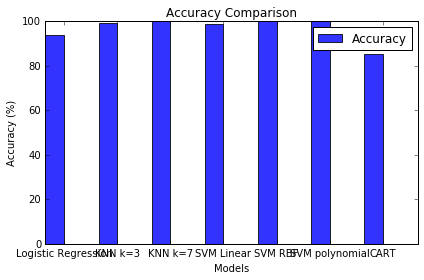

In [18]:
n_groups = 7
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects = plt.bar(index, acc, bar_width,
                 alpha=opacity,
                 color='b', label='Accuracy')
 
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison')
plt.xticks(index + bar_width, model_names)
plt.legend()
 
plt.tight_layout()
plt.show()
